In [1]:
!pip install -Uqq fastbook
import fastbook
from fastbook import *
from fastai.vision.all import *

     |████████████████████████████████| 720 kB 4.3 MB/s 
     |████████████████████████████████| 1.2 MB 40.1 MB/s 
     |████████████████████████████████| 49 kB 4.0 MB/s 
     |████████████████████████████████| 187 kB 48.9 MB/s 
     |████████████████████████████████| 56 kB 4.1 MB/s 
     |████████████████████████████████| 51 kB 322 kB/s 
     |████████████████████████████████| 561 kB 41.5 MB/s 
     |████████████████████████████████| 130 kB 48.2 MB/s 


In [2]:
help(untar_data)



Help on function untar_data in module fastai.data.external:

untar_data(url, archive=None, data=None, c_key='data', force_download=False)
    Download `url` to `fname` if `dest` doesn't exist, and extract to folder `dest`



In [3]:
untar_data??

In [4]:
path = untar_data(URLs.PETS)

In [5]:
# set the seed
np.random.seed(42)

In [6]:
#How's the data look?
path.ls()[:3]

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/annotations'),Path('/root/.fastai/data/oxford-iiit-pet/images')]

In [7]:
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/annotations'),Path('/root/.fastai/data/oxford-iiit-pet/images')]

In [9]:
doc(path.ls)

,Type,Default
n_max,,None
file_type,,None
file_exts,,None


In [12]:
??URLs

In [13]:
(path/'images').ls()

(#7393) [Path('/root/.fastai/data/oxford-iiit-pet/images/japanese_chin_39.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/pug_57.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/english_cocker_spaniel_176.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/basset_hound_32.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/newfoundland_170.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/samoyed_16.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/pug_155.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Birman_92.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/german_shorthaired_197.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Sphynx_153.jpg')...]

In [14]:
(path/'annotations').ls()

(#7) [Path('/root/.fastai/data/oxford-iiit-pet/annotations/test.txt'),Path('/root/.fastai/data/oxford-iiit-pet/annotations/xmls'),Path('/root/.fastai/data/oxford-iiit-pet/annotations/trimaps'),Path('/root/.fastai/data/oxford-iiit-pet/annotations/trainval.txt'),Path('/root/.fastai/data/oxford-iiit-pet/annotations/README'),Path('/root/.fastai/data/oxford-iiit-pet/annotations/list.txt'),Path('/root/.fastai/data/oxford-iiit-pet/annotations/._trimaps')]

In [15]:
fnames = get_image_files(path/'images')

In [16]:

pat = r'(.+)_\d+.jpg$'

In [18]:
item_tfms = RandomResizedCrop(460, min_scale=0.75, ratio=(1.,1.))
batch_tfms = [*aug_transforms(size=224, max_warp=0), Normalize.from_stats(*imagenet_stats)]
bs=64

In [19]:
dls = ImageDataLoaders.from_name_re(path, fnames, pat, batch_tfms=batch_tfms, 
                                   item_tfms=item_tfms, bs=bs)

In [20]:
pets = DataBlock(blocks=(ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(),
                 get_y=RegexLabeller(pat = r'/([^/]+)_\d+.*'),
                 item_tfms=item_tfms,
                 batch_tfms=batch_tfms)

In [21]:
path_im = path/'images'

In [22]:
dls = pets.dataloaders(path_im, bs=bs)

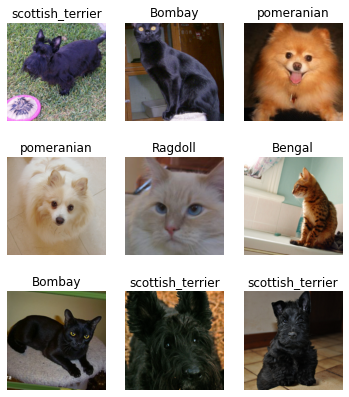

In [23]:
dls.show_batch(max_n=9, figsize=(6,7))

In [24]:
dls.vocab

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']

In [25]:
dls.vocab.o2i

{'Abyssinian': 0,
 'Bengal': 1,
 'Birman': 2,
 'Bombay': 3,
 'British_Shorthair': 4,
 'Egyptian_Mau': 5,
 'Maine_Coon': 6,
 'Persian': 7,
 'Ragdoll': 8,
 'Russian_Blue': 9,
 'Siamese': 10,
 'Sphynx': 11,
 'american_bulldog': 12,
 'american_pit_bull_terrier': 13,
 'basset_hound': 14,
 'beagle': 15,
 'boxer': 16,
 'chihuahua': 17,
 'english_cocker_spaniel': 18,
 'english_setter': 19,
 'german_shorthaired': 20,
 'great_pyrenees': 21,
 'havanese': 22,
 'japanese_chin': 23,
 'keeshond': 24,
 'leonberger': 25,
 'miniature_pinscher': 26,
 'newfoundland': 27,
 'pomeranian': 28,
 'pug': 29,
 'saint_bernard': 30,
 'samoyed': 31,
 'scottish_terrier': 32,
 'shiba_inu': 33,
 'staffordshire_bull_terrier': 34,
 'wheaten_terrier': 35,
 'yorkshire_terrier': 36}

In [26]:
#Train a model
learn = cnn_learner(dls, resnet34, pretrained=True, metrics=error_rate).to_fp16()


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [28]:
# Train it for 1 cycles instead of 4 in the original code
learn.fit_one_cycle(1)


epoch,train_loss,valid_loss,error_rate,time
0,0.807645,0.361077,0.104871,01:53


In [29]:
learn.save('stage_1')

Path('models/stage_1.pth')

In [30]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()

len(dls.valid_ds)==len(losses)==len(idxs)

True

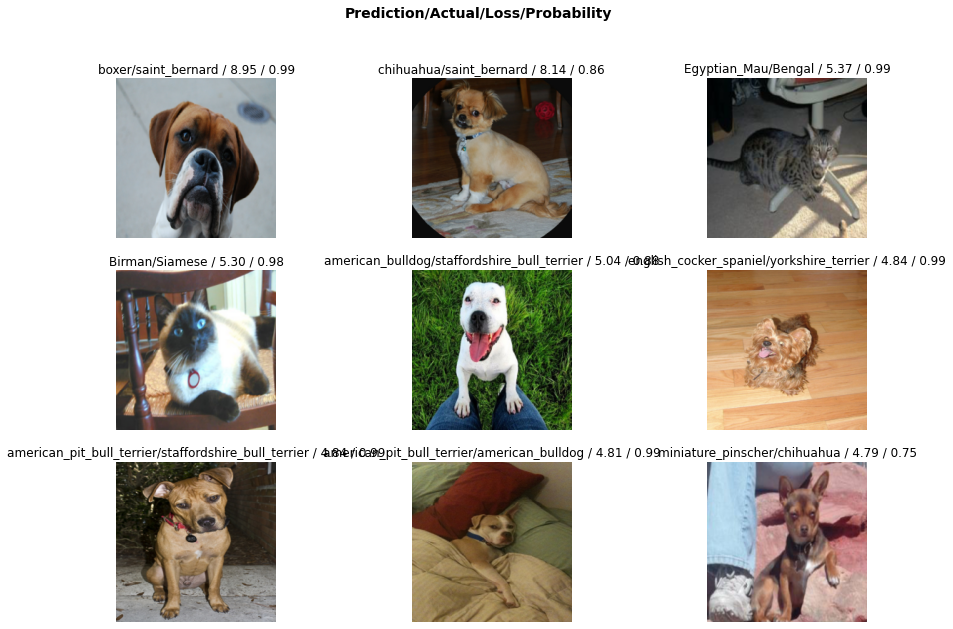

In [31]:
interp.plot_top_losses(9, figsize=(15,10))

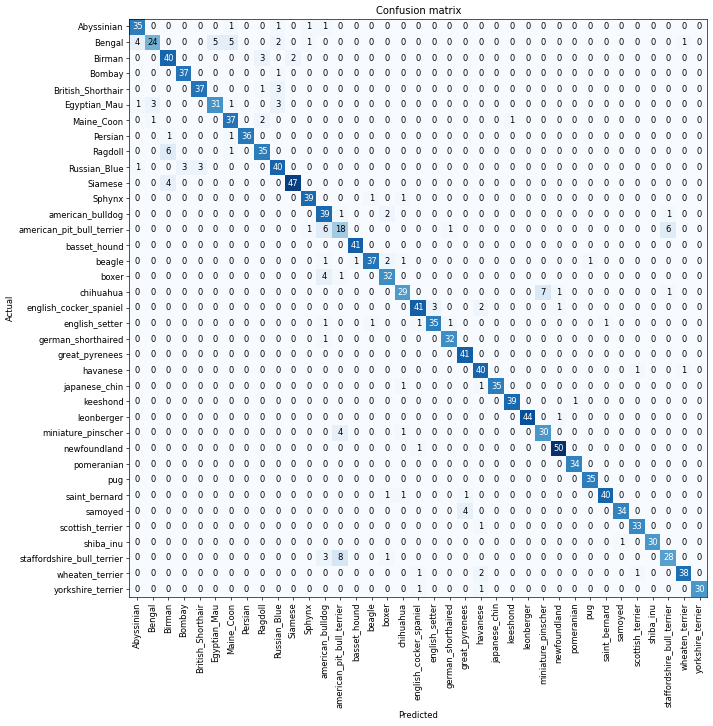

In [32]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [33]:
#We can also directly grab our most confused 
#(A raw version of the confusion matrix), and pass in a threshold
interp.most_confused(min_val=3)

[('staffordshire_bull_terrier', 'american_pit_bull_terrier', 8),
 ('chihuahua', 'miniature_pinscher', 7),
 ('Ragdoll', 'Birman', 6),
 ('american_pit_bull_terrier', 'american_bulldog', 6),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 6),
 ('Bengal', 'Egyptian_Mau', 5),
 ('Bengal', 'Maine_Coon', 5),
 ('Bengal', 'Abyssinian', 4),
 ('Siamese', 'Birman', 4),
 ('boxer', 'american_bulldog', 4),
 ('miniature_pinscher', 'american_pit_bull_terrier', 4),
 ('samoyed', 'great_pyrenees', 4),
 ('Birman', 'Ragdoll', 3),
 ('British_Shorthair', 'Russian_Blue', 3),
 ('Egyptian_Mau', 'Bengal', 3),
 ('Egyptian_Mau', 'Russian_Blue', 3),
 ('Russian_Blue', 'Bombay', 3),
 ('Russian_Blue', 'British_Shorthair', 3),
 ('english_cocker_spaniel', 'english_setter', 3),
 ('staffordshire_bull_terrier', 'american_bulldog', 3)]

In [34]:
#Unfreezing our data, fine-tuning, and our learning rates
# So, we have the model. Let's fine tune it. First, we need to load our model back in.
learn.load('stage_1');

In [35]:
learn.unfreeze()

In [36]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,1.367106,1.577833,0.418809,02:32
1,0.757897,0.554525,0.185386,02:32


In [37]:
learn.load('stage_1');

SuggestedLRs(valley=0.0003311311302240938)

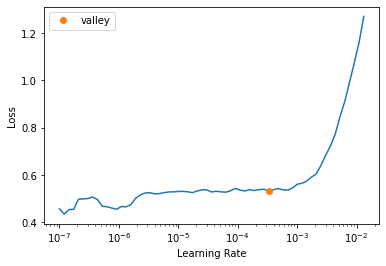

In [38]:
learn.lr_find()


In [39]:
learn.unfreeze()
learn.fit_one_cycle(2, lr_max=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.509193,0.301407,0.094046,02:32
1,0.432713,0.288320,0.089310,02:31


In [40]:
learn.save('stage_2')


Path('models/stage_2.pth')

Now lets try with a resnet50!
If you need to restart your kernel due to memory errors I've attached the dls code below:
Go ahead and try running the below code yourself. You should see a higher increase in accuracy!

Steps to try:

- Create your Learner
- Find a learning rate
- Fit for 5 epochs
- Unfreeze and fit for two more

In [42]:
learn = cnn_learner(dls, resnet50, pretrained=True, metrics=error_rate)


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

SuggestedLRs(valley=0.0004786300996784121)

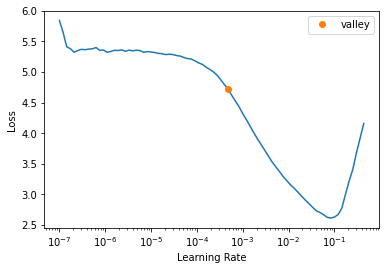

In [43]:
learn.lr_find()


In [44]:
learn.fit_one_cycle(2, lr_max=slice(3e-4, 3e-3))


epoch,train_loss,valid_loss,error_rate,time
0,0.695554,0.278189,0.090663,02:34
1,0.320027,0.229171,0.080514,02:34


In [45]:
learn.save('resnet50')


Path('models/resnet50.pth')

In [47]:
learn.load('resnet50')
learn.unfreeze()
learn.fit_one_cycle(2, lr_max=4e-4)

epoch,train_loss,valid_loss,error_rate,time
0,0.806847,1.496414,0.328146,03:23
1,0.428965,0.368102,0.119080,03:22


In [48]:
learn.save('resnet50')


Path('models/resnet50.pth')